In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./data/data_NO2.csv', sep=';')

In [3]:
data['datetime_utc'] = pd.to_datetime(data['datetime_utc'])
data.set_index('datetime_utc', inplace=True)

In [4]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult

register_matplotlib_converters()
sns.set_style("darkgrid")


In [5]:
mstl = MSTL(data["volume_production"], periods=[24, 24 * 7, 24 * 30, 24 * 365])

In [6]:
res = mstl.fit()

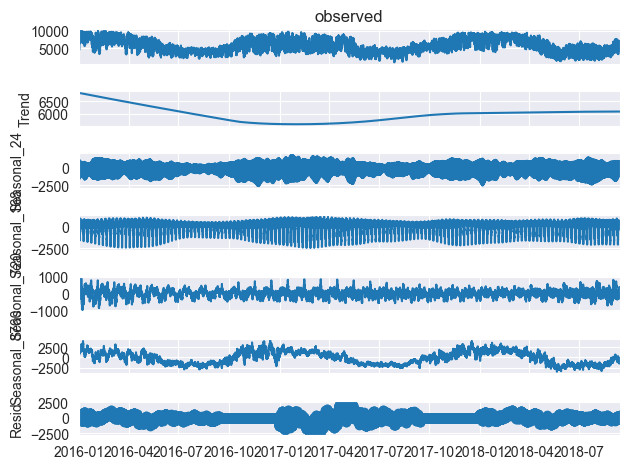

In [7]:
ax = res.plot()

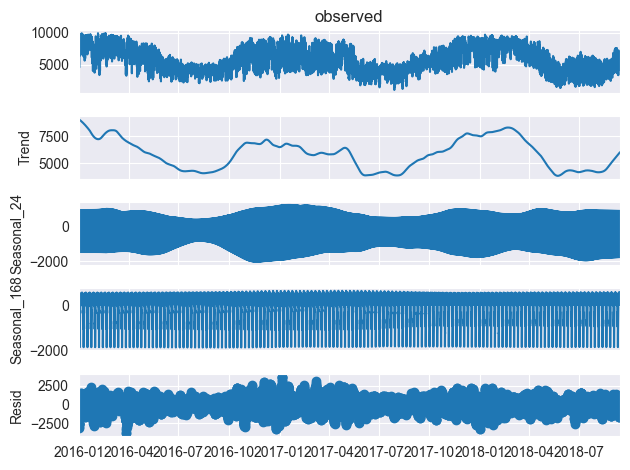

In [8]:
mstl = MSTL(
    data["volume_production"],
    periods=[24, 24 * 7],  # The periods and windows must be the same length and will correspond to one another.
    windows=[101, 101],  # Setting this large along with `seasonal_deg=0` will force the seasonality to be periodic.
    iterate=3,
    stl_kwargs={
                "trend":1001, # Setting this large will force the trend to be smoother.
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
)
res = mstl.fit()
ax = res.plot()

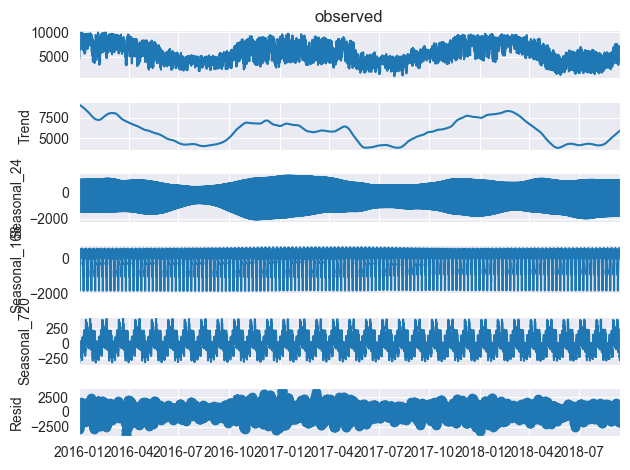

In [9]:
mstl = MSTL(
    data["volume_production"],
    periods=[24, 24 * 7, 24 * 30],  # The periods and windows must be the same length and will correspond to one another.
    windows=[101, 101, 101],  # Setting this large along with `seasonal_deg=0` will force the seasonality to be periodic.
    iterate=3,
    stl_kwargs={
                "trend":1001, # Setting this large will force the trend to be smoother.
                "seasonal_deg":0, # Means the seasonal smoother is fit with a moving average.
               }
)
res = mstl.fit()
ax = res.plot()

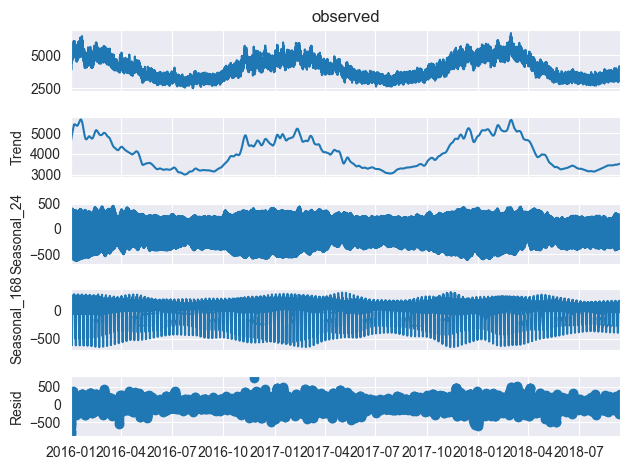

In [11]:
mstl = MSTL(data["volume_demand"], periods=[24, 24 * 7], iterate=3, stl_kwargs={"seasonal_deg": 0,
                                                                          "inner_iter": 2,
                                                                          "outer_iter": 0})
res = mstl.fit() # Use .fit() to perform and return the decomposition
ax = res.plot()
plt.tight_layout()

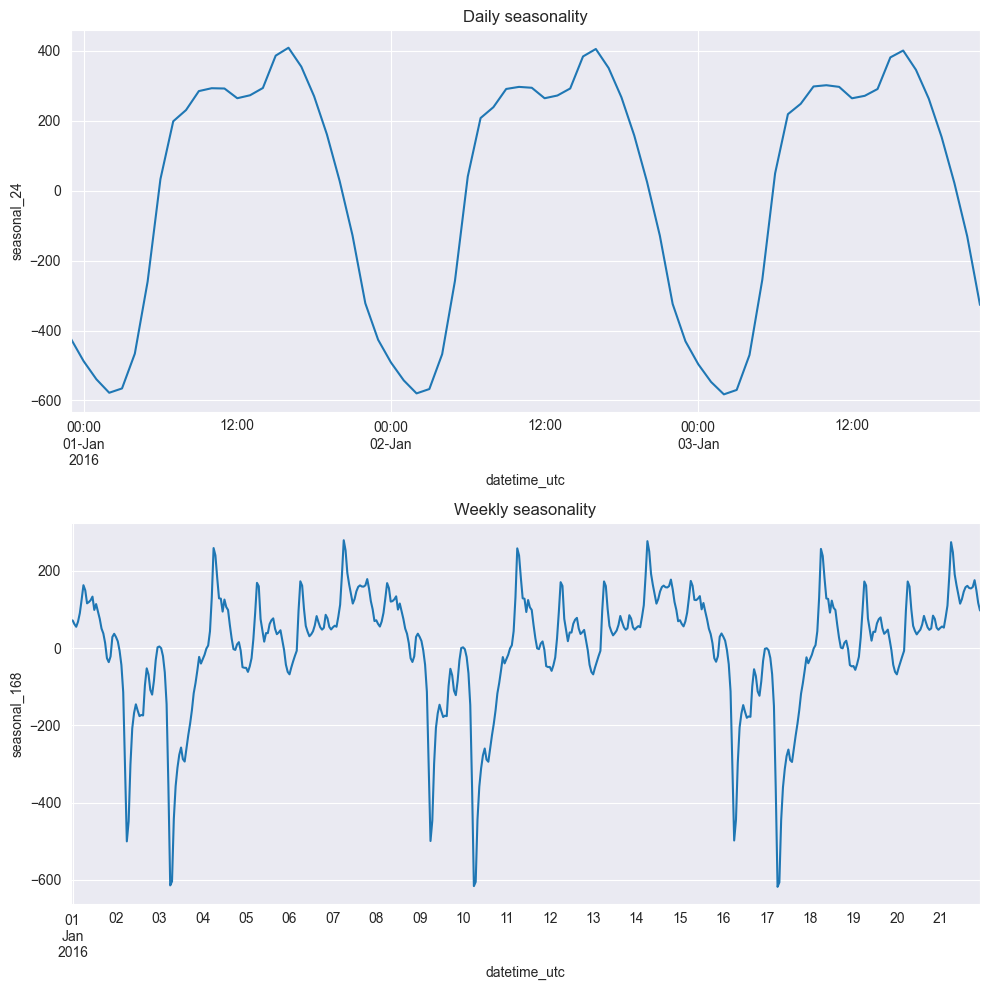

In [12]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10])
res.seasonal["seasonal_24"].iloc[:24*3].plot(ax=ax[0])
ax[0].set_ylabel("seasonal_24")
ax[0].set_title("Daily seasonality")

res.seasonal["seasonal_168"].iloc[:24*7*3].plot(ax=ax[1])
ax[1].set_ylabel("seasonal_168")
ax[1].set_title("Weekly seasonality")

plt.tight_layout()


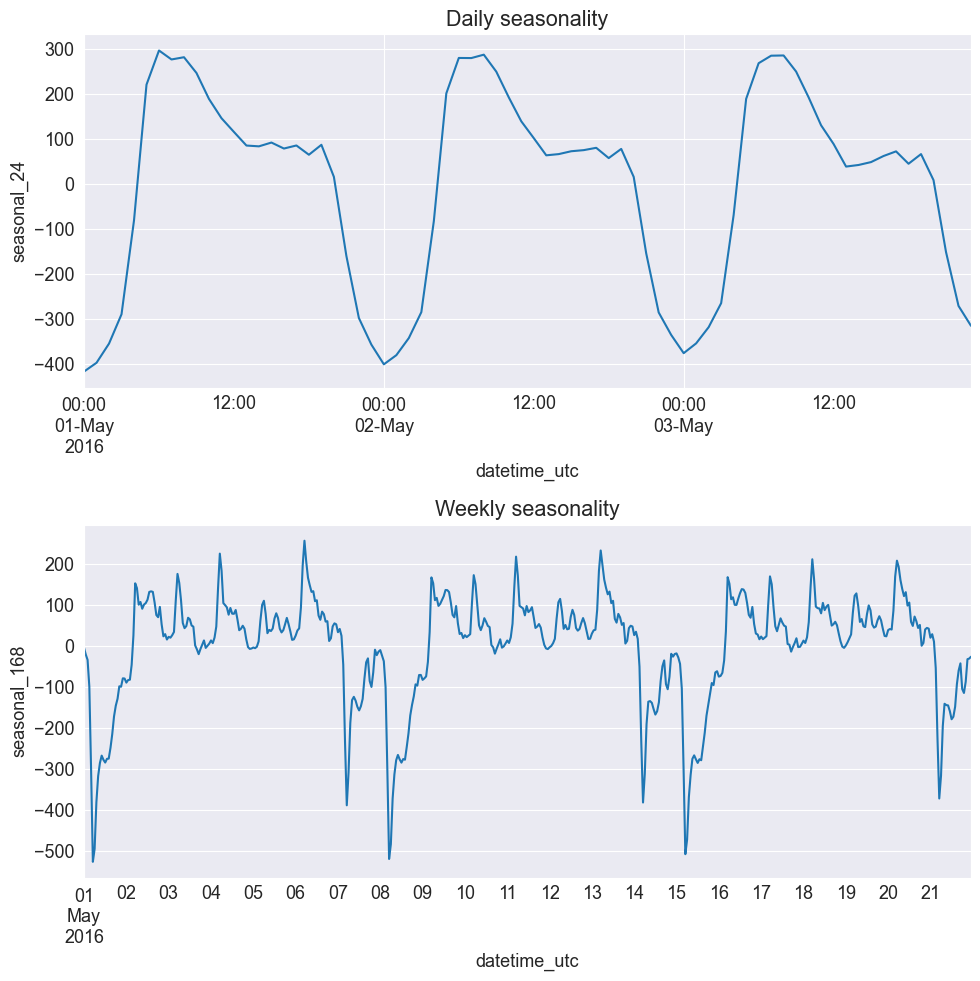

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=[10,10])
mask = res.seasonal.index.month==5
res.seasonal[mask]["seasonal_24"].iloc[:24*3].plot(ax=ax[0])
ax[0].set_ylabel("seasonal_24")
ax[0].set_title("Daily seasonality")

res.seasonal[mask]["seasonal_168"].iloc[:24*7*3].plot(ax=ax[1])
ax[1].set_ylabel("seasonal_168")
ax[1].set_title("Weekly seasonality")

plt.tight_layout()


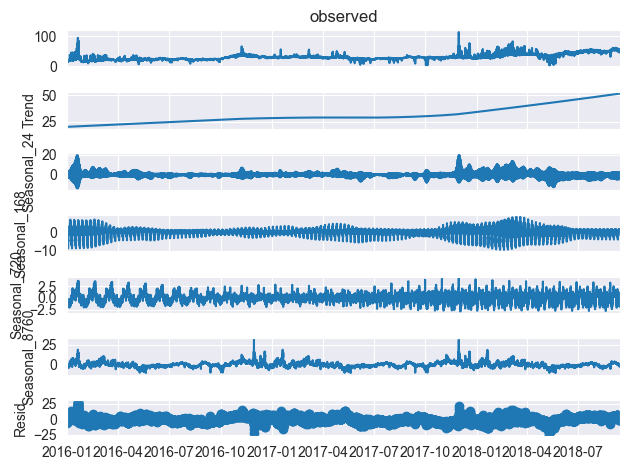

In [23]:
mstl = MSTL(data["spot_price"], periods=[24, 24 * 7, 24*30, 24*365], iterate=3, stl_kwargs={
    "seasonal_deg": 0,
    "inner_iter": 2,
    "outer_iter": 0})
res = mstl.fit() # Use .fit() to perform and return the decomposition
ax = res.plot()
plt.tight_layout()

In [40]:
res.seasonal

,seasonal_24,seasonal_168,seasonal_720,seasonal_8760
datetime_utc,,,,
2015-12-31 23:00:00+00:00,-1.662527,0.855839,-1.293808,-2.210101
2016-01-01 00:00:00+00:00,-2.125759,1.046032,-1.397384,-2.076420
2016-01-01 01:00:00+00:00,-2.482048,1.096518,-1.414849,-2.189403
2016-01-01 02:00:00+00:00,-2.771811,1.140178,-1.296594,-2.088574
2016-01-01 03:00:00+00:00,-3.045137,1.013646,-1.161889,-1.623981
...,...,...,...,...
2018-09-12 22:00:00+00:00,-2.083394,0.018747,-0.051934,-0.343781
2018-09-12 23:00:00+00:00,-3.542911,0.029961,0.260197,0.356014
2018-09-13 00:00:00+00:00,-4.425064,0.251087,0.528507,0.166817


In [42]:
data = res.seasonal.reset_index()